In [2]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
import string
import nltk
from collections import Counter, OrderedDict
from text_matcher import matcher

In [3]:
def clean_text(text):
    
    text2 = re.sub('!','.',text)
    text2 = re.sub(' \...',' ',text)
    text2 = re.sub('  ',' ',text2)
    char  = [';',':','!','«','»',',','“','”','(',')']
    pattern = '[' + ''.join(char) + ']'
    new_str = re.sub(pattern,'', text2)
    #clean_words = [word for word in new_str.split() if word.lower() not in stopwords_latin]
    #new_str = ' '.join(clean_words)
    new_str = re.sub(r'\? [A-Z]','.',new_str)
    new_str = re.sub(r'\?','',new_str)
    pattern = r"\. ([a-z])"
    new_str = re.sub(pattern, r" \1", new_str)
    string = re.sub('v','u',new_str)
    string = re.sub('j','i',string)

    string = re.sub(r' +',' ',string)
    string = string.lower()
    
    return string

In [4]:
def clean(text):
    
    text2 = re.sub('!','.',text)
    text2 = re.sub(' \...',' ',text)
    text2 = re.sub('  ',' ',text2)
    char  = [';',':','!','«','»',',','“','”','(',')']
    pattern = '[' + ''.join(char) + ']'
    new_str = re.sub(pattern,'', text2)

    new_str = re.sub(r'\? [A-Z]','.',new_str)
    new_str = re.sub(r'\?','',new_str)
    pattern = r"\. ([a-z])"
    new_str = re.sub(pattern, r" \1", new_str)
    string = new_str.split('.')
    string = [x for x in string if x != '']
    string = [x for x in string if x != ' ']
    string = [x.lower() for x in string]
    string = [x.lstrip() for x in string]
    string = [x.rstrip() for x in string]
    string = [re.sub('v','u',x) for x in string]
    string = [re.sub('j','i',x) for x in string]
    
    return string

In [5]:
def len_split(sentence):
    return len(sentence.split())

In [6]:
def remove_punctuation(input_string):
    # Create a translation table to map punctuation characters to None (to remove them)
    translator = str.maketrans('', '', string.punctuation)
    # Use the translate method to remove the punctuation characters
    cleaned_string = input_string.translate(translator)
    return cleaned_string

In [7]:
def lower_split(sentence):
    
    sentence = sentence.lower().split()
    sentence_len = [len(i) for i in sentence]
    
    
    return sentence_len

In [8]:
def remove_signs(sentence):
    sentence = re.sub('©','',sentence)
    sentence = re.sub('|','',sentence)
    #sentence = re.sub('..','.',sentence)
    return sentence

In [46]:
file = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/PDV_grams.xlsx'
df = pd.read_excel(file)

In [47]:
df = df[['Date','Livre','Numéro de la charte','textes']]
df['clean'] = df['textes'].apply(clean_text)
df['test'] = df['textes'].apply(clean)
df['len'] = df['clean'].apply(len_split)
df['mendenhall'] = df['clean'].apply(remove_punctuation).apply(lower_split)

In [48]:
def remove_character_from_values(dictionary, character):
    for key, value in dictionary.items():
        if isinstance(value, str):
            dictionary[key] = value.replace(character, '')
def delete_empty_values(dictionary):
    keys_to_delete = []
    for key, value in dictionary.items():
        if not value:
            keys_to_delete.append(key)
    for key in keys_to_delete:
        dictionary.pop(key)
def delete_empty_strings_from_list_of_lists(list_of_lists):
    return [[element for element in sub_list if element.strip()] for sub_list in list_of_lists]
def remove_chars_from_list_of_lists(list_of_lists, chars_to_remove):
    def remove_chars(s, chars):
        return ''.join(c for c in s if c not in chars)

    return [[remove_chars(element, chars_to_remove) for element in sub_list] for sub_list in list_of_lists]
def split(sentence):
    return sentence.split()

In [49]:
df['split'] = df['clean'].apply(split)

In [17]:
#nbr mots
df

,Date,Livre,Numéro de la charte,textes,clean,test,len,mendenhall,split
0,1240,Livre 1,1,Collegerunt pontifices et Pharisei consilium i...,collegerunt pontifices et pharisei consilium i...,[collegerunt pontifices et pharisei consilium ...,1208,"[11, 10, 2, 8, 9, 2, 4, 2, 8, 9, 11, 7, 11, 4,...","[collegerunt, pontifices, et, pharisei, consil..."
1,1246,Livre 1,2,"Illos felices describit antiquitas, quibus ex ...",illos felices describit antiquitas quibus ex a...,[illos felices describit antiquitas quibus ex ...,605,"[5, 7, 9, 10, 6, 2, 6, 9, 7, 8, 6, 6, 7, 8, 2,...","[illos, felices, describit, antiquitas, quibus..."
2,1245,Livre 1,3,"Etsi causae nostrae iustitiam, uulgaris famae ...",etsi causae nostrae iustitiam uulgaris famae p...,[etsi causae nostrae iustitiam uulgaris famae ...,1303,"[4, 6, 7, 9, 8, 5, 10, 2, 8, 8, 10, 9, 2, 11, ...","[etsi, causae, nostrae, iustitiam, uulgaris, f..."
3,1247,Livre 1,4,Ne per excogitatae malignitatis astutiam iste ...,ne per excogitatae malignitatis astutiam iste ...,[ne per excogitatae malignitatis astutiam iste...,255,"[2, 3, 11, 12, 8, 4, 7, 5, 8, 3, 6, 5, 9, 4, 4...","[ne, per, excogitatae, malignitatis, astutiam,..."
4,1243,Livre 1,5,"Virum industrium et illustrem R., comitem Thol...",virum industrium et illustrem r comitem tholos...,[uirum industrium et illustrem r comitem tholo...,323,"[5, 10, 2, 9, 1, 7, 10, 8, 7, 2, 7, 7, 5, 2, 1...","[virum, industrium, et, illustrem, r, comitem,..."
...,...,...,...,...,...,...,...,...,...
358,1220-1266,Livre 6,28,Fauorabilis petitio supplicantium effectu debe...,fauorabilis petitio supplicantium effectu debe...,[fauorabilis petitio supplicantium effectu deb...,21,"[11, 7, 13, 7, 5, 11, 8, 2, 3, 2, 4, 5, 9, 11,...","[fauorabilis, petitio, supplicantium, effectu,..."
359,1238-1239,Livre 6,29,"Tenore presentium notum facimus uniuersis, quo...",tenore presentium notum facimus uniuersis quod...,[tenore presentium notum facimus uniuersis quo...,83,"[6, 10, 5, 7, 9, 4, 3, 12, 14, 8, 10, 9, 8, 9,...","[tenore, presentium, notum, facimus, uniuersis..."
360,1224,Livre 6,30,Ad hoc summi dispensatione consilii principali...,ad hoc summi dispensatione consilii principali...,[ad hoc summi dispensatione consilii principal...,58,"[2, 3, 5, 13, 8, 11, 10, 10, 10, 2, 6, 7, 10, ...","[ad, hoc, summi, dispensatione, consilii, prin..."
361,1240,Livre 6,31,"Consueuit innata benignitas, consuetudo regnan...",consueuit innata benignitas consuetudo regnant...,[consueuit innata benignitas consuetudo regnan...,57,"[9, 6, 10, 10, 10, 8, 2, 6, 10, 5, 8, 7, 2, 3,...","[consueuit, innata, benignitas, consuetudo, re..."


In [14]:
liste = df['split'].tolist()
liste2 = [element for sub_list in liste for element in sub_list]
x = dict(Counter(liste2).most_common())
sum(1 for value, count in x.items() if count == 1)

11778

In [25]:
df['len'].describe()

count     363.000000
mean      224.688705
std       250.876804
min         3.000000
25%        91.000000
50%       162.000000
75%       262.500000
max      3168.000000
Name: len, dtype: float64

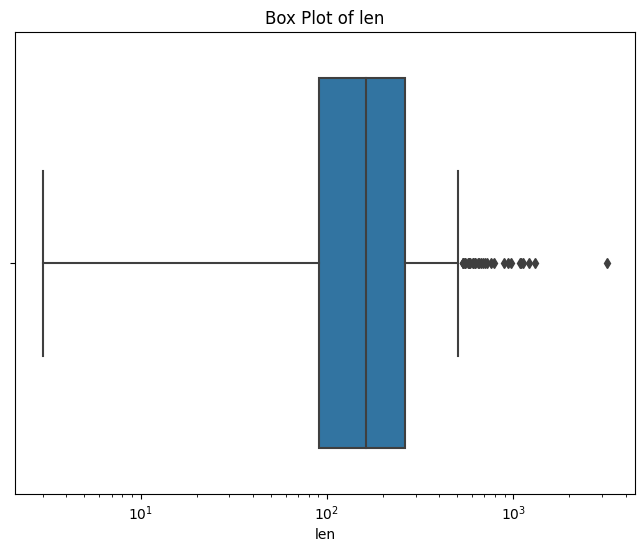

In [15]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=df['len'], orient='h')
plt.xscale('log')
plt.title(f'Box Plot of len')
plt.xlabel('len')
plt.show()

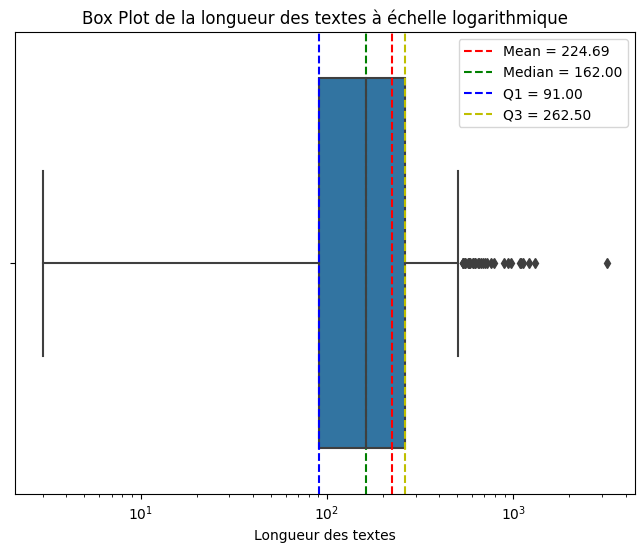

In [28]:
plt.figure(figsize=(8, 6))

# Plot the box plot using seaborn
sns.boxplot(x=df['len'], orient='h')

# Calculate mean, median, and quartiles
mean_value = df['len'].mean()
median_value = df['len'].median()
q1_value = df['len'].quantile(0.25)
q3_value = df['len'].quantile(0.75)

# Add lines for mean, median, and quartiles
plt.axvline(mean_value, color='r', linestyle='dashed', label=f'Mean = {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='dashed', label=f'Median = {median_value:.2f}')
plt.axvline(q1_value, color='b', linestyle='dashed', label=f'Q1 = {q1_value:.2f}')
plt.axvline(q3_value, color='y', linestyle='dashed', label=f'Q3 = {q3_value:.2f}')

plt.xscale('log')
plt.title('Box Plot de la longueur des textes à échelle logarithmique')
plt.xlabel('Longueur des textes')

# Show the legend
plt.legend()


plt.savefig('boxplot_len_pdv.png',dpi=300)
plt.show()

In [29]:
livre_1

,Date,Livre,Numéro de la charte,textes,clean,test,len,mendenhall,split
0,1240,Livre 1,1,Collegerunt pontifices et Pharisei consilium i...,collegerunt pontifices et pharisei consilium i...,[collegerunt pontifices et pharisei consilium ...,1208,"[11, 10, 2, 8, 9, 2, 4, 2, 8, 9, 11, 7, 11, 4,...","[collegerunt, pontifices, et, pharisei, consil..."
1,1246,Livre 1,2,"Illos felices describit antiquitas, quibus ex ...",illos felices describit antiquitas quibus ex a...,[illos felices describit antiquitas quibus ex ...,605,"[5, 7, 9, 10, 6, 2, 6, 9, 7, 8, 6, 6, 7, 8, 2,...","[illos, felices, describit, antiquitas, quibus..."
2,1245,Livre 1,3,"Etsi causae nostrae iustitiam, uulgaris famae ...",etsi causae nostrae iustitiam uulgaris famae p...,[etsi causae nostrae iustitiam uulgaris famae ...,1303,"[4, 6, 7, 9, 8, 5, 10, 2, 8, 8, 10, 9, 2, 11, ...","[etsi, causae, nostrae, iustitiam, uulgaris, f..."
3,1247,Livre 1,4,Ne per excogitatae malignitatis astutiam iste ...,ne per excogitatae malignitatis astutiam iste ...,[ne per excogitatae malignitatis astutiam iste...,255,"[2, 3, 11, 12, 8, 4, 7, 5, 8, 3, 6, 5, 9, 4, 4...","[ne, per, excogitatae, malignitatis, astutiam,..."
4,1243,Livre 1,5,"Virum industrium et illustrem R., comitem Thol...",virum industrium et illustrem r comitem tholos...,[uirum industrium et illustrem r comitem tholo...,323,"[5, 10, 2, 9, 1, 7, 10, 8, 7, 2, 7, 7, 5, 2, 1...","[virum, industrium, et, illustrem, r, comitem,..."
...,...,...,...,...,...,...,...,...,...
358,1220-1266,Livre 6,28,Fauorabilis petitio supplicantium effectu debe...,fauorabilis petitio supplicantium effectu debe...,[fauorabilis petitio supplicantium effectu deb...,21,"[11, 7, 13, 7, 5, 11, 8, 2, 3, 2, 4, 5, 9, 11,...","[fauorabilis, petitio, supplicantium, effectu,..."
359,1238-1239,Livre 6,29,"Tenore presentium notum facimus uniuersis, quo...",tenore presentium notum facimus uniuersis quod...,[tenore presentium notum facimus uniuersis quo...,83,"[6, 10, 5, 7, 9, 4, 3, 12, 14, 8, 10, 9, 8, 9,...","[tenore, presentium, notum, facimus, uniuersis..."
360,1224,Livre 6,30,Ad hoc summi dispensatione consilii principali...,ad hoc summi dispensatione consilii principali...,[ad hoc summi dispensatione consilii principal...,58,"[2, 3, 5, 13, 8, 11, 10, 10, 10, 2, 6, 7, 10, ...","[ad, hoc, summi, dispensatione, consilii, prin..."
361,1240,Livre 6,31,"Consueuit innata benignitas, consuetudo regnan...",consueuit innata benignitas consuetudo regnant...,[consueuit innata benignitas consuetudo regnan...,57,"[9, 6, 10, 10, 10, 8, 2, 6, 10, 5, 8, 7, 2, 3,...","[consueuit, innata, benignitas, consuetudo, re..."


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances

In [16]:
corpus = df['clean'].tolist()

In [21]:
def tf_idf_with_most_common_words(corpus, max_features=1000):

    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

In [95]:
tfidf_matrix, feature_names = tf_idf_with_most_common_words(corpus, max_features=1000)
tfidf_matrix_dense = tfidf_matrix.toarray()
euclidean_distance_matrix = pairwise_distances(tfidf_matrix_dense, metric='euclidean')
tfidf_matrix_dense

array([[0.        , 0.02621327, 0.01396075, ..., 0.        , 0.        ,
        0.        ],
       [0.02824065, 0.        , 0.05601341, ..., 0.        , 0.        ,
        0.        ],
       [0.014418  , 0.02684757, 0.        , ..., 0.        , 0.        ,
        0.02477469],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.2490129 , ..., 0.        , 0.        ,
        0.        ],
       [0.07041819, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

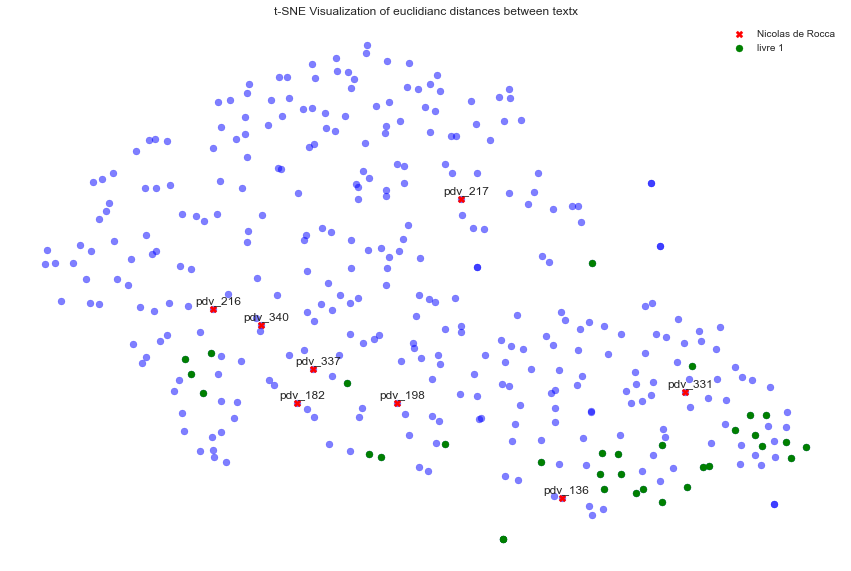

In [94]:
tsne = TSNE(n_components=2, random_state=42)
euclidian_tsne = tsne.fit_transform(euclidean_distance_matrix)

# Select the indices of the points you want to highlight
highlight_indices = [136,182,198,216,217,331,337,340]
livre = list(range(0,33))

# Visualization
plt.figure(figsize=(15, 10))
plt.scatter(euclidian_tsne[:, 0], euclidian_tsne[:, 1], color='blue', alpha=0.5)  # All points in blue with some transparency

# Highlight specific points with a different color (e.g., red) and marker (e.g., 'X')
highlighted = plt.scatter(euclidian_tsne[highlight_indices, 0], euclidian_tsne[highlight_indices, 1], color='red', marker='X', label='Nicolas de Rocca')

highlighted_books = plt.scatter(euclidian_tsne[livre, 0], euclidian_tsne[livre, 1], color='green', marker='o', label='livre 1')

for i, idx in enumerate(highlight_indices):
    plt.annotate(f'pdv_{idx}', (euclidian_tsne[idx, 0], euclidian_tsne[idx, 1]), textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of euclidianc distances between texts')
plt.legend()
plt.axis('off')
plt.show()

In [51]:
damien = list(df[df['Livre'] == 'Livre 1'].reset_index()['len'])
damien2 = list(df[df['Livre'] == 'Livre 2'].reset_index()['len'])
damien3 = list(df[df['Livre'] == 'Livre 3'].reset_index()['len'])
damien4 = list(df[df['Livre'] == 'Livre 4'].reset_index()['len'])
damien5 = list(df[df['Livre'] == 'Livre 5'].reset_index()['len'])
damien6 = list(df[df['Livre'] == 'Livre 6'].reset_index()['len'])


In [53]:
dataframes = [damien,damien2,damien3,damien4,damien5,damien6]

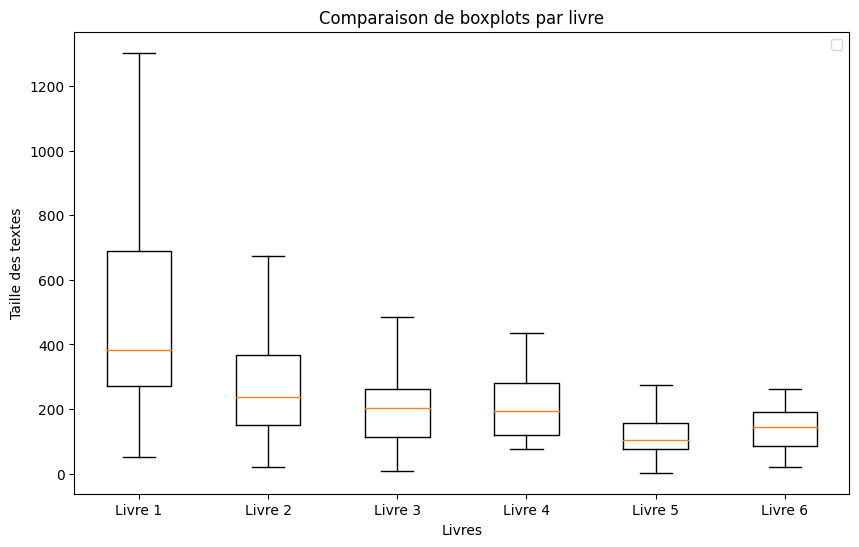

In [72]:
means = [sum(values) / len(values) for values in dataframes]
medians = [sorted(values)[len(values) // 2] if len(values) % 2 != 0 else (sorted(values)[len(values) // 2] + sorted(values)[len(values) // 2 - 1]) / 2 for values in dataframes]
q1s = [sorted(values)[len(values) // 4] if len(values) % 4 != 0 else (sorted(values)[len(values) // 4] + sorted(values)[len(values) // 4 - 1]) / 2 for values in dataframes]
q3s = [sorted(values)[len(values) // 4 * 3] if len(values) % 4 != 0 else (sorted(values)[len(values) // 4 * 3] + sorted(values)[len(values) // 4 * 3 - 1]) / 2 for values in dataframes]

# Create comparative box plots
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(dataframes, labels=['Livre 1', 'Livre 2', 'Livre 3', 'Livre 4', 'Livre 5', 'Livre 6'], showfliers=False)

handles, labels = plt.gca().get_legend_handles_labels()


filtered_handles = [h for i, h in enumerate(handles) if i % 4 == 0]  # Keep only mean handles
plt.legend(filtered_handles, labels, loc='upper right')

plt.title('Comparaison de boxplots par livre')
plt.xlabel('Livres')
plt.ylabel('Taille des textes')
plt.savefig('distribution_par_livre.png',dpi = 300)

plt.show()